# 3 Linear Regression

Important questions to ask when analyzing the `Advertising` data set:
1. Is there a relationship between advertising budget and sales?
2. How string is the relationship between advertising budget and sales?
3. Which media are associated with sales?
4. How large is the association between each medium and sales?
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media

In [1]:
Advertising <- subset(read.csv("../99DataSets/Advertising.csv"),select = -X)
head(Advertising)

,TV,radio,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


## 3.1 Simple Linear Regression

Predicting a quantitative response $Y$ on the basis of a single predictor variable $X$.

<a id=eq3_1>
\begin{align}\tag{3.1}
Y \approx \beta_0 + \beta_1 X
\end{align}</a>

For the `Advertising` data set, our linear model is:
\begin{align}
\text{sales} \approx \beta_0 + \beta_1 \times \text{TV}
\end{align}

slope-intercept:
<a id=eq3_2>
\begin{align}\tag{3.2}
\hat{y} = \hat{\beta_0} + \hat{\beta_1}x
\end{align}</a>

### 3.1.1 Estimating the Coefficients
In practice, $\beta_0$ and $\beta_1$ are unknown.  
We need to make predictions in order to use (3.1). Let
\begin{align}
(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)
\end{align}
represent $n$ observation paris, each of which consists of a measurement of $X$ and a measurement of $Y$.  

In the `Advertising` example, this data set consists of the TV advertising budget and product sales in $n=200$ different markets.  

Our goal is to obtain coefficient estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the linear model (3.1) fits the available data well&mdash;that is, so that $y_i \approx \hat{\beta_0} + \hat{\beta_1} x_i$ for $i=1,\ldots,n$.

We want to find an intercept $\hat{\beta_0}$ and a slope $\hat{\beta_1}$ such that the resulting line is as close as  possible to the $n=200$ data points.

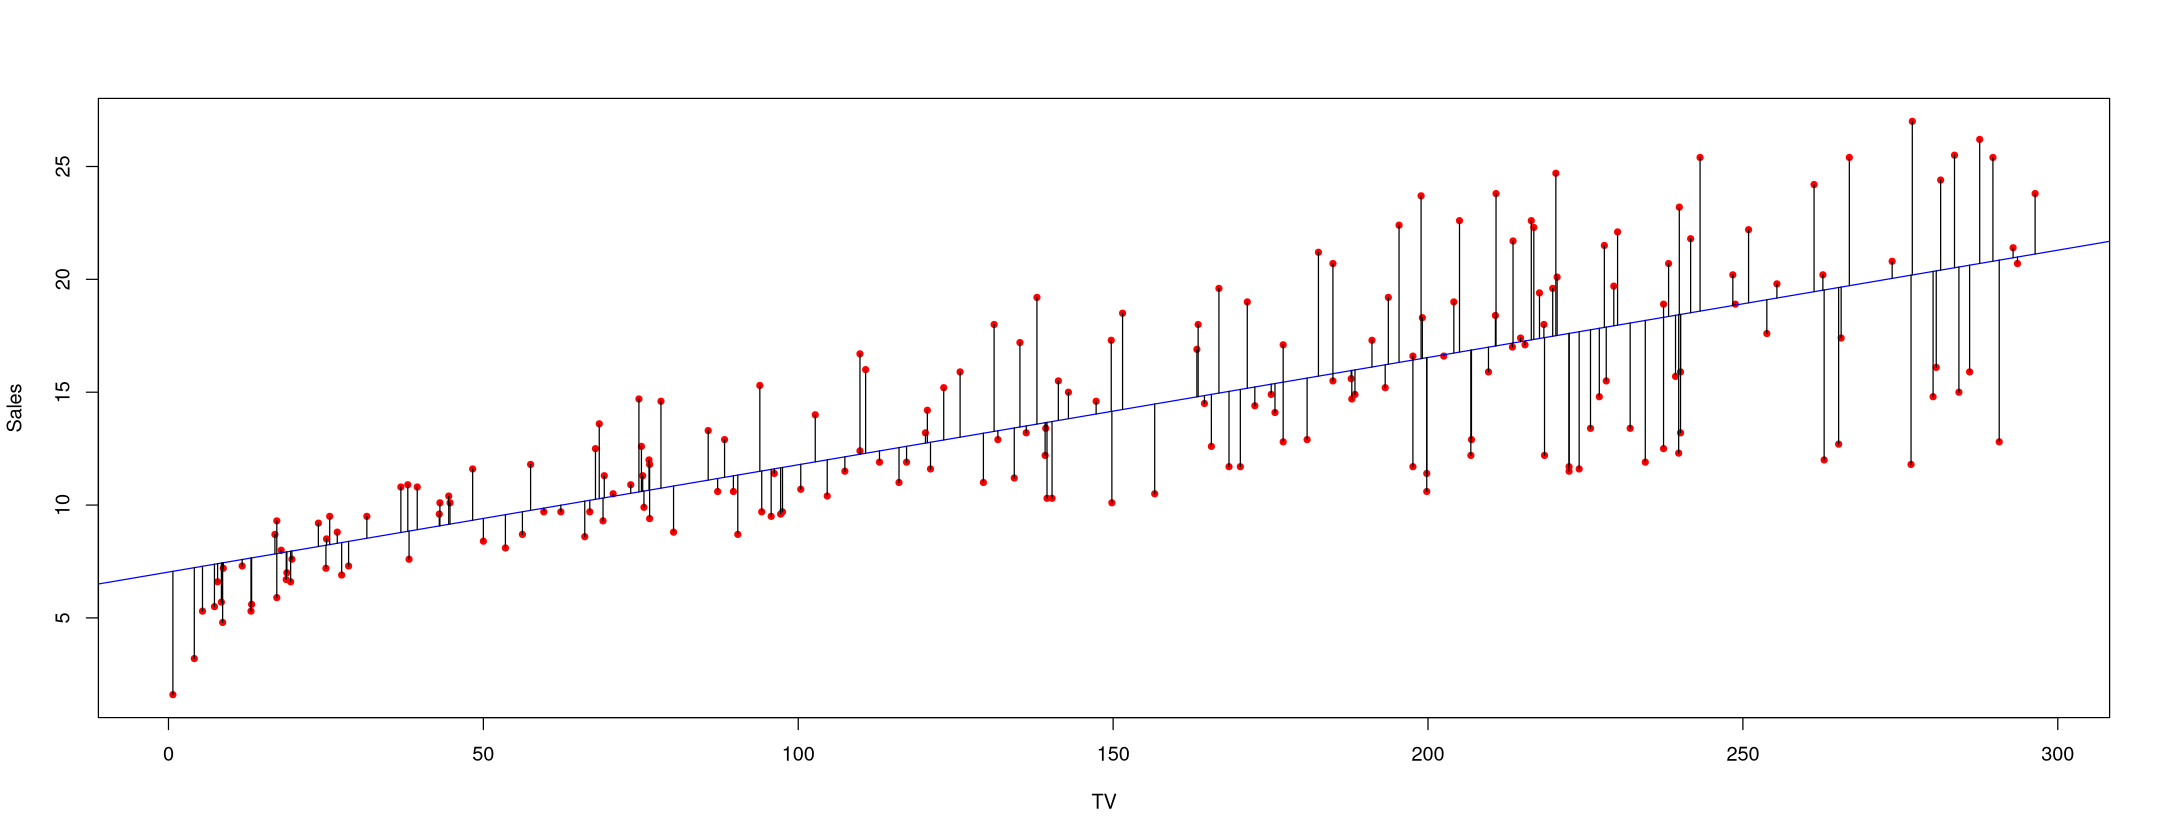

In [5]:
plot.residuals <- function(x, fit, col="red") {
    for(idx in 1:length(fit$fit)){
        lines(c(x[idx],x[idx]),c(fit$fit[idx],fit$fit[idx]+fit$residual[idx]),col=col)
    }
}
lm.fit.TV <- lm(sales ~ TV, data=Advertising)
options(repr.plot.width=18, repr.plot.height=7)
plot(Advertising$TV, Advertising$sales, col="red", pch=20, xlab="TV", ylab="Sales")
abline(lm.fit.TV, col="blue")
plot.residuals(Advertising$TV, lm.fit.TV, col="black")
options(repr.plot.width=7, repr.plot.height=7)

Residual Sum of Squares (RSS)
\begin{align}
\text{RSS} = e_1^2 + e_2^2 + \cdots + e_n^2
\end{align}

or equivalently as
<a id=eq3_3>
\begin{align}\tag{3.3}
\text{RSS} = \left(y_1 - \hat{\beta_0} - \hat{\beta_1}x_1\right)^2 +
             \left(y_2 - \hat{\beta_0} - \hat{\beta_1}x_2\right)^2 + \cdots +
             \left(y_n - \hat{\beta_0} - \hat{\beta_1}x_n\right)^2
\end{align}</a>

The least squares approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the RSS.
<a id=eq3_4>
\begin{align}\tag{3.4}
\hat{\beta_1} &= \frac{ \sum_{i=1}^n{ \left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right) }}
                     { \sum_{i=1}^n{ \left(x_i - \bar{x}\right)^2 }} \text{, } \\
\hat{\beta_0} &= \bar{y} - \hat{\beta_1}\bar{x} \text{,}
\end{align}</a>

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates

From (2.1), we assume that the _true_ relationship between $X$ and $Y$ takes the form $Y = f(X) + \epsilon$ for some unknown function $f$, where $\epsilon$ is a mean-zero random error term. If $f$ is to be approximated by a linear function, then we can write this relationship as

<a id=eq3_5>
\begin{align}\tag{3.5}
Y = \beta_0 + \beta_1 X + \epsilon
\end{align}</a>

$\beta_0$ is the intercept term  
$\beta_1$ is the slope  

The model given by (3.5) defines the _population regression line_, which is the best linear approximation to the true relationship between $X$ and $Y$.  

_least squares line_

Standard error
<a id=eq3_7>
\begin{align}\tag{3.7}
\text{Var}(\hat{\mu}) = \text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n}\text{,}
\end{align}</a>

$\sigma$ is the standard deviation of each of the relaizations $y_i$ of $Y^2$.  

The standard error tells us the average amount that this estimate $\hat{\mu}$ differs from the actual value of $\mu$.  

Equation 3.7 also tells us how this deviation shrinks with $n$&mdash;the more observations we have, the smaller the standard error of $\hat{\mu}$.

Standard Errors for $\hat{\beta_0}$ and $\hat{\beta_1}$
<a id=eq3_8>
\begin{align}\tag{3.8}
\text{SE}(\hat{\beta_0})^2 = \sigma^2\left[\frac{1}{n} + \frac{\bar{x}^2}{\sum^n_{i=1}(x_i - \bar{x})^2}\right]\text{, } \ \ \ 
\text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum^n_{i=1}(x_i - \bar{x})^2}\text{, }
\end{align}</a>

where $\sigma^2 = \text{Var}(\epsilon)$. 

For these formulas to be strictly valid, we need to assume that the errors $\epsilon_i$ for each observation have common variance $\sigma^2$ and are uncorrelated. This is clearly not true for Figure 3.1, but the formula still turns out to be a good approximation.

Residual Standard Error
\begin{align}
\text{RSE} = \sqrt{\frac{\text{RSS}}{(n - 2)}}
\end{align}

Standard errors can be used to compute _confidence intervals_.

* A $95%$ confidence interval is defined as a range of values such that with $95%$ probability, the range will contain the true unknown value of the parameter.
* The range is defined in terms of lower and upper limits computed from the sample data.

A $95%$ confidence level has the following property: if we take repeated samples and construct the confidence interval for each sample, $95%$ of the intervals will contain the true unkown value of the parameter.  

For linear regression, the $95%$ confidence interval for $\beta_1$ approximately takes the form
<a id=eq3_9>
\begin{align}\tag{3.9}
\hat{\beta_1} \pm 2 \cdot \text{SE}(\hat{\beta_1})\text{.}
\end{align}</a>
That is, there is approximately a $95%$ chance that the interval
<a id=eq=3_10>
\begin{align}\tag{3.10}
\left[\hat{\beta_1} - 2 \cdot \text{SE}(\hat{\beta_1})\text{, } \ \ \hat{\beta_1} + 2 \cdot \text{SE}(\hat{\beta_1})\right]
\end{align}
will contain the true value of $\beta_1$. Similarly, a confidence interval for $\beta_0$ approximately takes the form
<a id=eq3_11>
\begin{align}\tag{3.11}
\hat{\beta_0} \pm 2 \cdot \text{SE}(\hat{\beta_0})\text{.}
\end{align}</a>

In order to obtain a confidence interval in R for the coefficient estimates, we can use the `confint()` command.

In [ ]:
confint(lm.fit.TV)

Standard errors can also be used to perform _hypothesis tests_ on the coefficients. The most common hypothesis test involves testing the _null hypothesis_ of
<a id=eq3_12></a>
\begin{align}\tag{3.12}
\text{H}_0: \text{There is no relationship between }X\text{ and }Y
\end{align}
versus the _alternative hypothesis_
<a id=eq3_13></a>
\begin{align}\tag{3.13}
\text{H}_a: \text{There is some relationship between }X\text{ and }Y\text{.}
\end{align}
Mathematically, this corresponds to testing
\begin{align}
\text{H}_0: \beta_1 = 0
\end{align}
versus
\begin{align}
\text{H}_a: \beta_1 \ne 0\text{,}
\end{align}
since if $\beta_1 = 0$ then the model (3.5) reduces to $Y = \beta_0 + \epsilon$, and $X$ is not associated with $Y$. To test the null hypothesis, we need to determine whether $\hat{\beta_1}$, our estimate for $\beta_1$, is sufficiently far from zero that we can be confident that $\beta_1$ is non-zero. How far is far enough? This of course depends on the accuracy of $\hat{\beta_1}$&mdash;that is, it depends on $\text{SE}(\hat{\beta_1})$. If $\text{SE}(\hat{\beta_1})$ is small, then even relatively small values of $\hat{\beta_1}$ may provide strong evidence that $\beta_1 \ne 0$, and hence there is a relationship between $X$ and $Y$. In contrast, if $\text{SE}(\hat{\beta_1})$ is large, then $\hat{\beta_1}$ must be large in absolute value in order for us to reject the null hypothesis.

In practice, we compute a _t-statistic_
<a id=eq3_14></a>
\begin{align}\tag{3.14}
t = \frac{\hat{\beta_1} - 0}{\text{SE}(\hat{\beta_1})}\text{, }
\end{align}

We can use the `summary()` function to obtain many of the statistical information we need.

In [ ]:
summary(lm.fit.TV)

In [ ]:
names(summary(lm.fit.TV))

The Coefficients can be found using `coefficients`.

In [ ]:
summary(lm.fit.TV)$coefficients

### 3.1.3 Assessing the Accuracy of the Model
In R you can get the RSS, $R^2$ and the F-statistic using the `summary()` function.

In [ ]:
cat("Residual standard error: ", summary(lm.fit.TV)$sigma, "\n")
cat("R^2: ", summary(lm.fit.TV)$r.squared, "\n")
cat("F-Statistic: ", summary(lm.fit.TV)$fstatistic[1], "\n")

#### Residual Standard Error
<a id=eq3_15>
\begin{align}\tag{3.15}
\text{RSE} = \sqrt{\frac{1}{n-2}\text{RSS}} =
\sqrt{\frac{1}{n-2}\sum^n_{i=1}{(y_i - \hat{y_i})^2}}\text{.}
\end{align}

Residual Sum of Squares
<a id=eq3_16>
\begin{align}\tag{3.16}
\text{RSS} = \sum^n_{i=1}(y_i - \hat{y_i})^2\text{.}
\end{align}</a>

#### $R^2$ Statistic
The RSE provides an absolute measure of lack of fit of the model (3.5) to the data. But since it is measured in the units of $Y$, it is not always clear what constitutes a good RSE. The $R^2$ statistic provides an alternative measure of fit. It takes the form of a _proportion_&mdash;the proportion of variance explained&mdash;and so it always takes on a value between $0$ and $1$, and is independent of the scale of $Y$.
<a id=eq3_17>
\begin{align}\tag{3.17}
R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}
\end{align}</a>
where $\text{TSS} = \sum(y_i - \bar{y})^2$ is the _total sum of squares_, and RSS is defined in (3.16).

TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, $\text{TSS} - \text{RSS}$ measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the _proportion of variability in_ $Y$ _that can be explained using_ $X$.

An $R^2$ statistic that is close to $1$ indicates that a large proportion of the variability in the response is explained by the regression.  
A number near $0$ indicates that the regression does not explain much of the variability in the response; this might occur because the linear model is wrong, or the error variance $\sigma^2$ is high, or both.

The $R^2$ statistic (3.17) has an interpretational advantage over the RSE (3.15), since unlike the RSE, it always lies between $0$ and $1$. However, it can still be challenging to determine what is a _good_ $R^2$ value, and in general, this will depend on the application.

The $R^2$ statistic is a measure of the linear relationship between $X$ and $Y$. Recall that _correlation_, defined as
<a id=eq3_18>
\begin{align}\tag{3.18}
\text{Cor}(X,Y) = \frac{\sum^n_{i=1}(x_i - \bar{x})(y_i - \bar{y}}{sqrt{\sum^n_{i=1}(x_i - \bar{x})^2}sqrt{\sum^n_{i=1}(y_i - \bar{y})^2}}\text{,}
\end{align}</a>
is also a measure of the linear relationship between $X$ and $Y$. This suggests that we might be able to use $r = \text{Cor}(X,Y)$ instead of $R^2$ in order to access the fit of the linear model.

## 3.2 Multiple Linear Regression

Linear regresions for the other predictors in advertising:

In [ ]:
lm.fit.radio = lm(sales ~ radio, data=Advertising)
summary(lm.fit.radio)$coefficients

In [ ]:
lm.fit.newpaper = lm(sales ~ newspaper, data=Advertising)
summary(lm.fit.radio)$coefficients

We can extend the simple linear regression model in (3.5) so that it can directly accommodate multiple predictors.
<a id=eq3_19>
\begin{align}\tag{3.19}
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon \text{,}
\end{align}</a>

In the advertising example, (3.19) becomes
<a id=eq3_20>
\begin{align}\tag{3.20}
\text{sales} = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{radio} + \beta_3 \times \text{newspaper} + \epsilon
\end{align}</a>

#### Estimating the Regression Coefficients

The new formula
<a id=eq3_21>
\begin{align}\tag{3.21}
\hat{y} = \hat{\beta_0} + \hat{\beta_1} x_{i1} + \hat{\beta_2} x_{i2} + \cdots + \hat{\beta_p} x_p
\end{align}</a>

We choose $\beta_0\text{, }\beta_1\text{, }\ldots\text{, }\beta_p$ to minimize the sum of squared residuals
<a id=eq3_22>
\begin{align}\tag{3.22}
\text{RSS} &= \sum^n_{i=1}(y_i - \hat{y_i})^2 \\
           &= \sum^n_{i=1}(y_i - \hat{\beta_0} - \hat{\beta_1} x_{i1} - \hat{\beta_2} x_{i2} - \cdots - \hat{\beta_p} x_p \text{.}
\end{align}</a>

In [ ]:
lm.fit.sales <- lm(sales ~ ., data=Advertising)
sum <- summary(lm.fit.sales)
sum$coefficients

The corelation matrix below shows that markets with high newspaper advertising tend to also have high radio advertising. This, along with the fact that newspaper advertising is not corelated to high sales indicates that newspaper advertising is a surrogate for radio advertiising; newspaper gets "credit" for the association between radio and sales.

In [ ]:
cor(Advertising)

### 3.2.2 Some Important Questions
1. Is at least one of the predictors $X_1\text{,}X_2\text{,}\ldots\text{,}X_p$ useful in predicting the response?
2. Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?

#### One: Is There a Relationship Between the Response and Predictors?
The null hypothesis versus the alternative. This hypothesis test is performed by computing the _F-statistic_,
<a id=eq3_23>
\begin{align}\tag{3.23}
F = \frac{(\text{TSS} - \text{RSS})/p}{\text{RSS}/(n - p - 1)}\text{,}
\end{align}</a>

where, as with simple linear regression, $\text{TSS} = \sum(y_i - \bar{y})^2$ and $\text{RSS} = \sum(y_i - \hat{y_i})^2$. If the linear model assumptions are correct, one can show that
\begin{align}
E\{\text{RSS}/(n - p - 1)\} = \sigma^2
\end{align}
and that, provided $H_0$ is true,
\begin{align}
E\{(\text{TSS} - \text{RSS})/p\} = \sigma^2\text{.}
\end{align}

If there is no relationship between the response and predictors, then the F-statistic would be close to $1$.  
If $H_a$ is true, then $E\{(\text{TSS} - \text{RSS})/p\} > \sigma^2$, so we expect $F$ to be greater than $1$.

In [ ]:
cat("Residual standard error: ", summary(lm.fit.sales)$sigma, "\n")
cat("R^2: ", summary(lm.fit.sales)$r.squared, "\n")
cat("F-Statistic: ", summary(lm.fit.sales)$fstatistic[1], "\n")

In [ ]:
names(lm.fit.sales)

In [ ]:
par(mfrow = c(2, 2))
plot(lm.fit.TV)